<img src="Figures/top_ML.png" alt="Drawing" style="width: 1000px;"/>

# Estadística 

<img src="Figures/stats1.png" alt="Drawing" style="width: 600px;"/>

### CONTENIDOS
* Muestra vs Población
* Resumen y limpieza de datos
* Estadística descriptiva
* Probabilidad

## 1. Muestra vs. Población

Siempre que se pueda, será mejor usar la población para responder a nuestras preguntas, pero a veces esto no es posible (no se tienen todos los datos, no todos los clientes tienen un Smart meter, recopilar todos los datos en una misma fuente es difícil, etc). En estos casos usaremos una muestra. 

¿Qué problema conlleva esto? Veamos un ejemplo, con nuestro dataset de Londres

In [1]:
import pandas as pd #importamos Pandas!
londres = pd.read_csv('Data/block_13_diario.csv')
londres.head(10)
londres

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000113,2011-12-14,1.0910,1.065250,1.674,28,0.305397,29.827,0.262
1,MAC000113,2011-12-15,0.3710,0.546521,1.434,48,0.410120,26.233,0.119
2,MAC000113,2011-12-16,0.3205,0.534708,2.034,48,0.464431,25.666,0.129
3,MAC000113,2011-12-17,0.2570,0.421500,1.068,48,0.274387,20.232,0.115
4,MAC000113,2011-12-18,0.3985,0.565333,2.218,48,0.450712,27.136,0.134
...,...,...,...,...,...,...,...,...,...
32987,MAC005416,2014-02-24,0.0660,0.111437,0.809,48,0.126465,5.349,0.050
32988,MAC005416,2014-02-25,0.0645,0.072521,0.238,48,0.030756,3.481,0.051
32989,MAC005416,2014-02-26,0.0675,0.107917,0.343,48,0.080074,5.180,0.049
32990,MAC005416,2014-02-27,0.0910,0.104250,0.296,48,0.054844,5.004,0.047


In [2]:
Muestra1 = londres.iloc[1:50,4]
Muestra2 = londres.iloc[1345:1854,4]

In [3]:
Muestra1.describe()

count    49.000000
mean      1.456020
std       0.632673
min       0.259000
25%       1.128000
50%       1.570000
75%       1.922000
max       2.653000
Name: energy_max, dtype: float64

In [4]:
Muestra2.describe()

count    509.000000
mean       1.630165
std        0.732034
min        0.066000
25%        1.013000
50%        1.676000
75%        2.115000
max        4.041000
Name: energy_max, dtype: float64

Como se puede observar para cada muestra obtenemos métricas o estadísticas distintas. Este error, es el *error de estimación* o el *error muestral* 

<h4><center>error de estimación = parámetro - estadística</center></h4>



In [5]:
Mean_pob=londres['energy_max'].mean()
error1=Mean_pob-Muestra1.mean()
error2=Mean_pob-Muestra2.mean()
print('Error muestra 1:',error1)
print('Error muestra 2:',error2)

Error muestra 1: -0.5764242637403644
Error muestra 2: -0.7505688811173737


Si lo hacemos para varias muestras, con el mismo número de observaciones de manera aleatória, de manera automática:

In [6]:
import matplotlib.pyplot as plt

num_observaciones = 50
num_muestras = 100
lista_mean=[]
for muestra in range(num_muestras):
    s=londres['energy_max'].sample(num_observaciones,random_state = muestra)
    lista_mean.append(s.mean())
    
plt.scatter(range(1,101),lista_mean)
plt.axhline(londres['energy_max'].mean())
plt.xlabel('Num de muestra')
plt.ylabel('Media aritmética')
plt.show()

<Figure size 640x480 with 1 Axes>

¿Cómo podemos solucionar esto? 

Una manera es, como se ha dicho, intentar acercarnos el máximo a toda la población. Veamos en nuestro ejemplo:

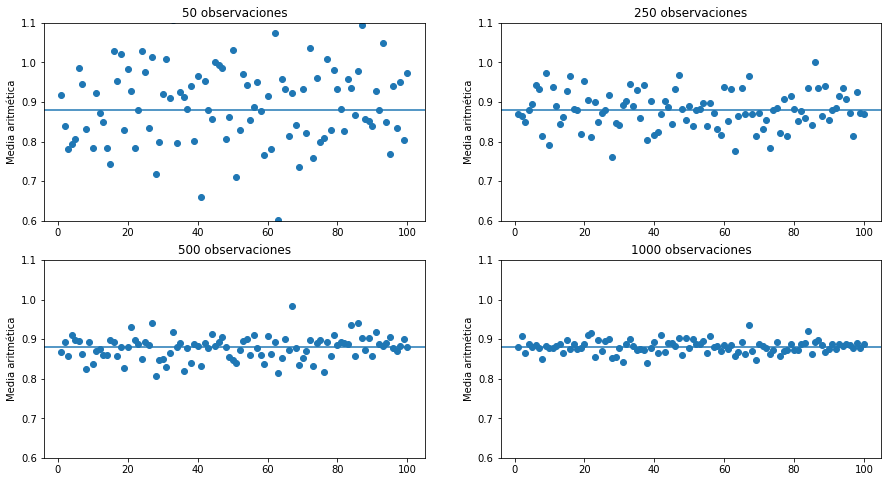

In [7]:
num_observaciones = 50
num_muestras = 100
listas_mean=[]
for num_observaciones in [50,250,500,1000]:
    lista_mean=[]
    for muestra in range(num_muestras):
        s=londres['energy_max'].sample(num_observaciones,random_state = muestra)
        lista_mean.append(s.mean())
    listas_mean.append(lista_mean)
    
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.scatter(range(1,101),listas_mean[0])
plt.axhline(londres['energy_max'].mean())
plt.ylim(0.6, 1.1)
plt.ylabel('Media aritmética')
plt.title('50 observaciones')

plt.subplot(2,2,2)
plt.scatter(range(1,101),listas_mean[1])
plt.axhline(londres['energy_max'].mean())
plt.ylim(0.6, 1.1)
plt.ylabel('Media aritmética')
plt.title('250 observaciones')

plt.subplot(2,2,3)
plt.scatter(range(1,101),listas_mean[2])
plt.axhline(londres['energy_max'].mean())
plt.ylim(0.6, 1.1)
plt.ylabel('Media aritmética')
plt.title('500 observaciones')

plt.subplot(2,2,4)
plt.scatter(range(1,101),listas_mean[3])
plt.axhline(londres['energy_max'].mean())
plt.ylim(0.6, 1.1)
plt.ylabel('Media aritmética')
plt.title('1000 observaciones')

plt.show()

También debemos asegurar que la muestra sea representativa de las diferentes posbles categorias que haya en nuestro dataset. Para eso se puede usar *stratified sampling*


<img src="Figures/stratified_sampling.jpg" alt="Drawing" style="width: 450px;"/>

## 2. Limpieza y resumen de datos

Pandas nos ofrece varias opciones para obtener un resumen de los datos como el método *describe* visto anteriormente. Además, podemos usar otros métodos como:

<img src="Figures/pandas_summary.png" alt="Drawing" style="width: 450px;"/>

También son interesantes los métodos *value_counts* i *nunique*

In [8]:
londres_raw = pd.read_csv('Data/block_13_diario_raw.csv')

londres_raw['energy_min'].max()

1.068

In [9]:
# Ejercicio
# Calcular la std de la energía mediana del contador MAC000113


Como ya se ha visto, hay varias opciones para tratar con valores vacíos, pero pandas nos ofrece algunas opciones rápidas e interesantes para ir rápido

<img src="Figures/missing.png" alt="Drawing" style="width: 450px;"/>

**Análisis Exploratorio de Datos - Ejemplo**

Instalar la librería y usarla en el *dataframe* londres

In [10]:
#library information: https://github.com/pandas-profiling/pandas-profiling
import pandas_profiling

In [11]:
pandas_profiling.ProfileReport(londres_raw)

C:\Users\marcjene\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,9
Number of observations,32992
Total Missing (%),0.0%
Total size in memory,2.3 MiB
Average record size in memory,72.0 B
Numeric,4
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,3


Primero, identificamos los tipos de valores que hay en cada columna. Esto es necesario ya que, como veremos más adelante, columnas numéricas y no numéricas se tratan usando métodos distintos.

In [12]:
londres_raw.dtypes

LCLid             object
day               object
energy_median    float64
energy_mean      float64
energy_max       float64
energy_count     float64
energy_std       float64
energy_sum       float64
energy_min       float64
dtype: object

Para ver si hay valores nulos, se puede usar el método .isna(), que devuelve convierte cada casilla en True (si es un NaN) o False (si no lo es), junto con el método .sum() para obtener el número total de NaNs por columna.

In [13]:
londres_raw.isna().sum()

LCLid              1
day                0
energy_median     11
energy_mean        7
energy_max         2
energy_count       2
energy_std       141
energy_sum         6
energy_min         3
dtype: int64

### Ejemplos
Vamos a tratar los NA de las distintas columnas con métodos diferentes:
* LCLid, energy_std: Copiaremos el valor de arriba.
* energy_median, energy_mean: Copiar el valor de abajo
* energy_count: Fijaremos el valor "48".
* energy_sum: Interpolación con method='linear'.
* energy_max: Mean de energy_max.
* energy_min: Mediana de energy_min.

In [14]:
# Ejemplo: LCLid
londres_raw['LCLid'].fillna(method='ffill', inplace=True)
# Ejercicio: energy_std

# Ejemplo: energy_count
londres_raw['energy_count'].fillna(48.0, inplace=True)
# Ejemplo: energy_median
londres_raw['energy_median'].fillna(method='bfill', inplace=True)
# Ejercicio: energy_mean

# Ejemplo: energy_sum
londres_raw['energy_sum'].interpolate(method='linear', inplace=True)

# Ejemplo: energy_max
londres_raw['energy_max'].fillna(londres['energy_max'].mean(), inplace=True)
# Ejercicio: energy_min


londres_raw.isna().sum()

LCLid              0
day                0
energy_median      0
energy_mean        7
energy_max         0
energy_count       0
energy_std       141
energy_sum         0
energy_min         3
dtype: int64

## 3. Estadística descriptiva

### Media, mediana y moda

#### Media

Podemos pensar que la media es el centro de gravedad de los datos de una distribución. Veamos un ejemplo y discutamos qué información se puede obtener y como nos puede ayudar o, al revés, desinformar si no se va con cuidado.

In [15]:
import random
import numpy as np

poblacion = [0,2,3,3,3,4,13]
muestra = random.choices(poblacion, k=4) #Seleccionar aleatoriamente 4 valores de la población

poblacion_media = np.mean(poblacion)
muestra_media = np.mean(muestra)

print('Media poblacion:', poblacion_media)
print('Media muestra:', muestra_media)
print(muestra)

Media poblacion: 4.0
Media muestra: 3.5
[3, 3, 4, 4]


En Pandas, se podría calcular de la siguente manera:

In [16]:
londres['energy_max'].mean()

0.8795961444229009

#### Media Ponderada y Mediana

Observemos el dataset *netherlands*

In [17]:
netherlands = pd.read_csv('Data/Electricity_Netherlands/coteq_electricity_2019.csv')
netherlands.dropna()
netherlands.head(3)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19,89.47,94.74,89,1x35,4037,89.47,0.0
1,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,40,100.00,97.50,80,1x35,2642,95.00,0.0
2,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16,100.00,100.00,100,1x35,1313,100.00,0.0


Si se quiere obtener la media del consumo de todo el dataset, se podría calcular como:

In [18]:
netherlands['annual_consume'].mean()

3971.755364806867

Pero si observamos bien el *dataset* podemos ver que esta media no es justa. ¿Por qué?

In [19]:
def weighted(values, weights):
    return sum([a*b for a,b in zip(values, weights)])/sum(weights)

weighted(netherlands['annual_consume'], netherlands['num_connections'])

3981.6492243827834

In [20]:
import numpy as np

np.average(netherlands['annual_consume'], weights=netherlands['num_connections'])

3981.6492243827834

Hemos visto como hay veces que computar la media, auque se pueda hacer, no sería correcto. En otras ocasiones, lo que nos pasará es que directamente no podemos calcular la media. Por ejemplo

In [21]:
Edad_clientes = [34,23,54,23,'más de 80',76,34,43,65,57,'más de 80',43,39,49]

En este caso, la **mediana** puede ser una buena medida alternativa.

Otra ventaja de la mediana es que no considera de manera equitativa todos los elementos de la distribución, lo que la hace más resistente a cambios en la distribución.

#### Moda

Hemos visto que en ocasiones la media no nos dará la información buscada, o simplemente no se podrá calcular y usaremos la mediana. En otras ocasiones, pero, la moda también nos puede ser de utilidad. Por ejemplo:

In [22]:
netherlands['city'].head(5)

0    ENTER
1     GOOR
2     GOOR
3     GOOR
4     GOOR
Name: city, dtype: object

In [23]:
netherlands['city'].value_counts()

ALMELO       1577
OLDENZAAL     714
GOOR          271
ENTER           1
Name: city, dtype: int64

### Variabilidad

Veamos dos distribuciones:

In [24]:
import numpy as np

A=[4,4,4,4]
B=[0,8,0,8]

print('La media de A es:',np.mean(A))
print('La media de B es:',np.mean(B))

La media de A es: 4.0
La media de B es: 4.0


Efectivamente, dos distribuciones muy distintas pueden tener la misma media.

Qué otro parámetro nos puede aydar a distinguir las dos distribuciones? Por ejemplo el rango:

In [25]:
rango_A=max(A)-min(A)
rango_B=max(B)-min(B)

print('El rango de A es:',rango_A)
print('El rango de B es:',rango_B)

El rango de A es: 0
El rango de B es: 8


Pero el rango solo considera dos valores, y no es una buena solución:

In [26]:
C=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,21]

rango_C=max(C)-min(C)
print('La media de C es:',np.mean(C))
print('El rango de C es:',rango_C)

La media de C es: 2.176470588235294
El rango de C es: 20


Vemos que tenemos una distribución con muy poca variabilidad, pero con un rango muy alto. Esto es debido a que solo considera dos valores de la distribución y no toda la distribución.

Si consideramos todos los valores podemos calcular:

<img src="Figures/variabilities.svg" alt="Drawing" style="width: 450px;"/>


$$ Distancia Media = \frac{1}{n} \sum_i (x_i - \mu) $$


#### Ejercicio

Usar esta formula para las tres distribuciones superiores. ¿Qué valores se obtienen?

Para evitarlo, usaremos:

$$ Varianza = \frac{1}{n} \sum_i (x_i - \mu)^2 $$

El problema de la varianza es que no da un valor que no nos ofrece ningún sentido.

In [27]:
consumos_semana=[0,7,8]

print('La varianza es de:', np.var(consumos_semana))

La varianza es de: 12.666666666666666


Para esto se usa la **desviacón estándar**

Varianza $$ \sigma^2 = \frac{1}{n} \sum_i (x_i - \mu)^2 $$

Desviacón estándar $$ \sigma = \sqrt (\frac{1}{n} \sum_i (x_i - \mu)^2) $$


In [28]:
consumos=[0,7,8]

print('La desviación estandar es de:', np.std(consumos_semana))
print('La media es de:', np.mean(consumos_semana))

La desviación estandar es de: 3.559026084010437
La media es de: 5.0


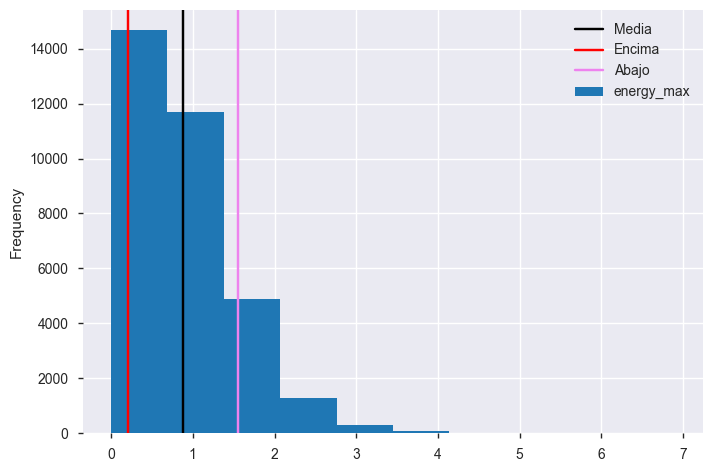

In [29]:
media = londres['energy_max'].mean()
st_dev = londres['energy_max'].std()
londres['energy_max'].plot.hist()
plt.axvline(media, color = 'Black', label = 'Media')
plt.axvline(media - st_dev, color = 'Red', label = 'Encima')
plt.axvline(media + st_dev, color = 'Violet', label = 'Abajo')
plt.legend()

¿Qué ocurre cuando no podemos trabajar con los datos de toda una población y solo tenemos una muestra?

Véamos qué passa si cogemos varias muestras al azar de nuestra distribución de energía máxima:

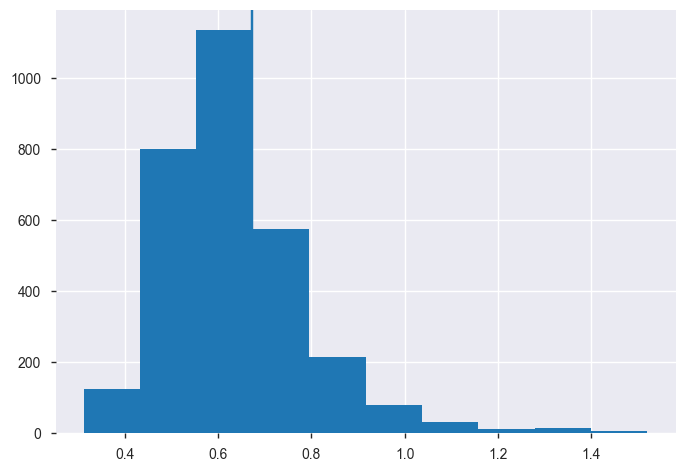

In [30]:
from math import sqrt
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)

std_lista=[]

for i in range(3000):
    sd=standard_deviation(londres['energy_max'].sample(20, random_state=i))
    std_lista.append(sd)

plt.hist(std_lista)
plt.axvline(londres['energy_max'].std())

Se puede ver como, en general, las desviaciones estándar siempre son inferiores a la real.

<img src="Figures/bessel1.svg" alt="Drawing" style="width: 600px;"/>

Conseguir muestras que tengas una varianza parecida es muy difícil.

<img src="Figures/bessel2.svg" alt="Drawing" style="width: 300px;"/>

Para corregir esto, se usa la corrección de Bessel, donde se divide por *n-1*.

Desviacón estándar $$ \sigma = s = \sqrt (\frac{1}{n-1} \sum_i (x_i - \mu)^2) $$

Pandas lo hace automáticamente


### Tablas de frecuencia

Una tabla de frecuencia nos permite saber cuántas veces aparece cada categoria en una variable. Por suerte Pandas ya nos ofrece herramientas para obtenerla rápidamente:

In [31]:
frec_counts = londres['LCLid'].value_counts()
frec_counts

MAC000113    808
MAC005270    750
MAC005269    750
MAC005317    744
MAC005319    744
MAC005313    744
MAC005367    737
MAC005403    733
MAC005405    733
MAC005392    733
MAC005400    733
MAC005404    733
MAC005408    732
MAC005411    732
MAC005407    732
MAC005412    732
MAC005416    731
MAC005415    731
MAC000301    728
MAC000309    725
MAC005331    703
MAC002662    666
MAC002663    666
MAC002676    666
MAC002702    665
MAC002666    665
MAC002764    660
MAC002761    660
MAC002750    660
MAC002757    660
MAC002754    660
MAC002756    660
MAC002509    602
MAC002512    602
MAC002525    600
MAC002517    600
MAC002518    600
MAC002539    600
MAC002530    600
MAC002522    600
MAC002519    600
MAC002514    600
MAC002513    600
MAC002558    600
MAC002605    599
MAC002557    598
MAC005322    531
MAC002510    501
MAC002767    497
MAC005274    286
Name: LCLid, dtype: int64

¿En el caso de trabajar con una variable más continua qué pasaría?

In [32]:
frec_counts = londres['energy_max'].value_counts()
frec_counts

0.047    171
0.046    148
0.024    137
0.000    127
0.045     87
        ... 
3.090      1
5.114      1
2.331      1
2.164      1
2.943      1
Name: energy_max, Length: 2987, dtype: int64

De repente, esta tabla no tiene mucho sentido ni mucha utilidad. Para esto podemos usar el código siguiente:

In [33]:
frec_counts = londres['energy_max'].value_counts(bins=5)
frec_counts

(-0.0079, 1.379]    26371
(1.379, 2.759]       6190
(2.759, 4.138]        372
(4.138, 5.518]         43
(5.518, 6.897]         16
Name: energy_max, dtype: int64

Para visualizar las tablas de frecuencia podemos usar Matplotlib como antes, o hacer los gráficos directamente des de pandas, que ya nos da esta posibilidad facilitando el trabajao.

Así, en el primer caso, tendríamos:

<AxesSubplot:>

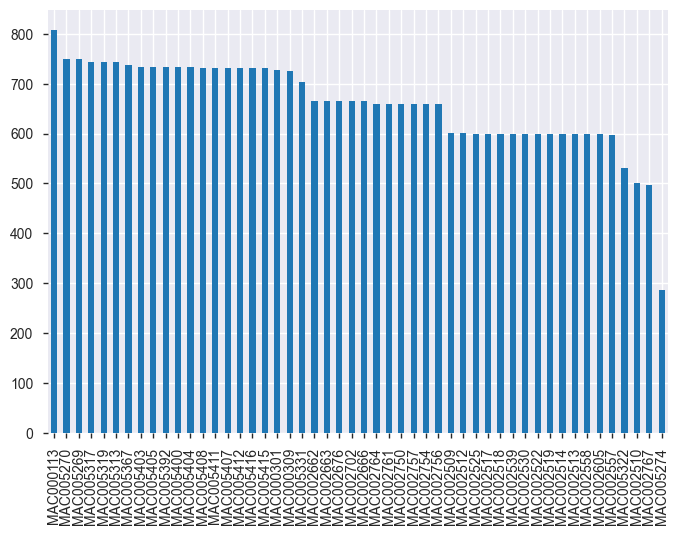

In [34]:
londres['LCLid'].value_counts().plot.bar()

Y en el segundo caso:

<AxesSubplot:>

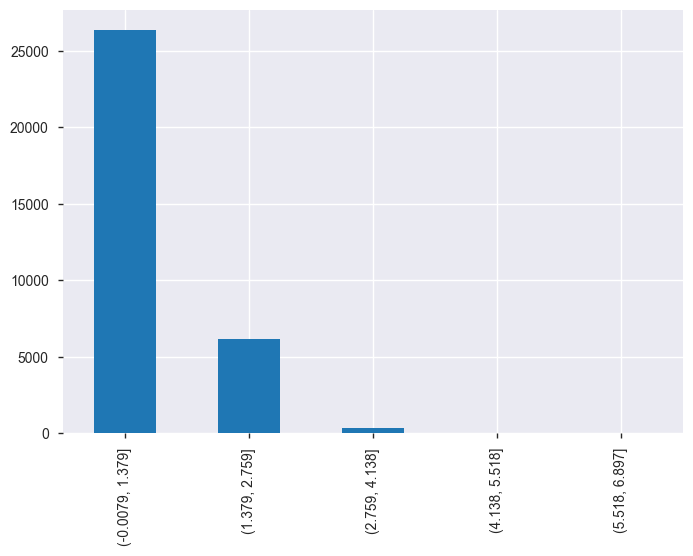

In [35]:
londres['energy_max'].value_counts(bins=5).plot.bar()

### Comparar distribuciones de frecuencia

La mejor manera de comparar y evaluar distintas distribuciones de frecuencia es visualizarlas. A continuación hay varios ejemplos:


<AxesSubplot:ylabel='Density'>

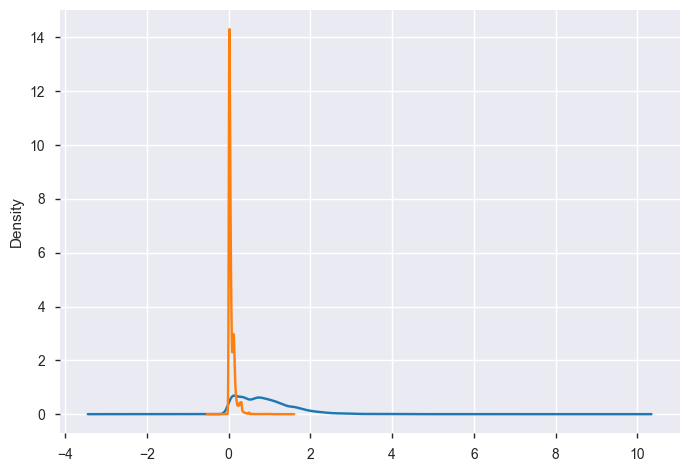

In [36]:
import warnings
warnings.filterwarnings('ignore')

londres['energy_max'].plot.kde()
londres['energy_min'].plot.kde()

<AxesSubplot:>

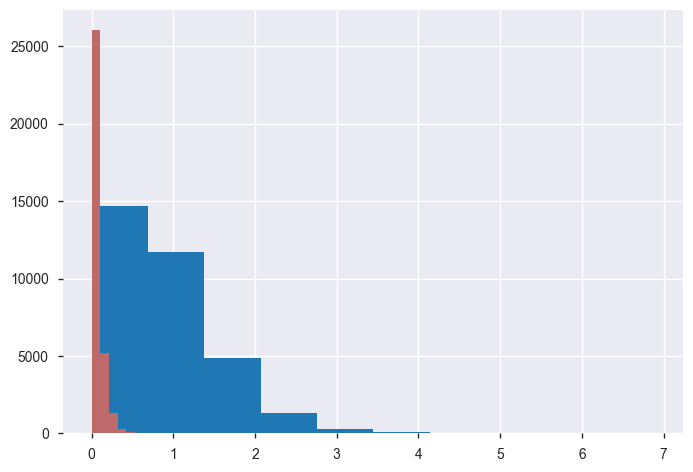

In [38]:
import seaborn as sns

londres['energy_max'].hist(histtype='stepfilled')
londres['energy_min'].hist(histtype='stepfilled', color=sns.desaturate("indianred", .75))

<AxesSubplot:>

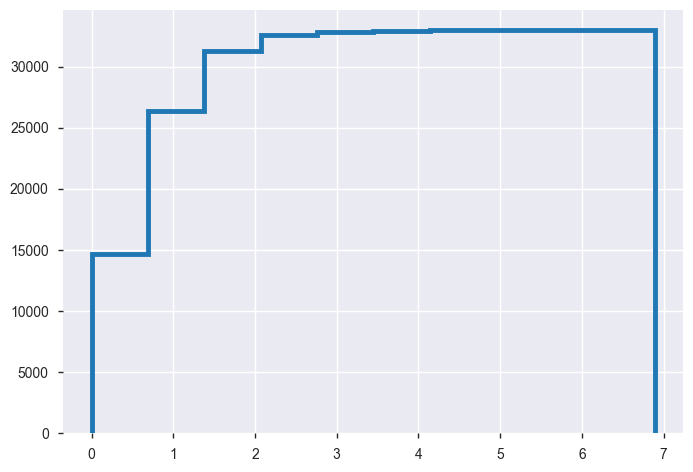

In [39]:
londres['energy_max'].hist(histtype='step', cumulative=True, linewidth=3.5)

#### Ejercicio

Hacer dos boxplots comparando la energia màxima entre dos contadores con LCLid distintos del dataset *londres* cargado.

In [40]:
# Vuestro Codigo!


**Ejercicio**

Inspeccionar la carpeta Data de este repositorio y abrir el archivo con los consumos de electricidad de la zona west-land infra en 2019 en un dataset llamado *netherlands* e inspeccionar las primeras filas



In [41]:
import pandas as pd

netherlands.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19,89.47,94.74,89,1x35,4037,89.47,0.0
1,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,40,100.00,97.50,80,1x35,2642,95.00,0.0
2,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16,100.00,100.00,100,1x35,1313,100.00,0.0
3,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AD,7471AE,GOOR,41,92.68,85.37,54,3x25,6405,92.68,0.0
4,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AG,7471AG,GOOR,14,85.71,100.00,36,3x25,4742,100.00,0.0


**Ejercicios** 

+ ¿Hay missing values? ¿Dónde?
+ ¿Dónde (ZIP code) hay más % de Smart Meters instalados?
+ ¿Cuántos tiposde conexión hay?
+ ¿Cómo se distribuyen los consumos anuales?
+ ¿Qué pueblo tiene más % de conexiones activas?
+ ¿Cuántos pueblos hay en total?
+ ¿Qué pueblo tiene más número de conexiones?
+ ¿En cuántos casos el zipcode_from es igual al zipcode_to?
+ Resumir por cada columna qué información se tiene y qué variaciones harías para adaptarla y limpiarla

### Asimetría

En una distribución, también podremos medir la asimetría o el *skewness*:

$$ g_1 = \frac{\frac{1}{n} \sum_i (x_i - \mu)^2 }{\frac{1}{n} \sum_i (x_i - \mu)^3 }$$

Otra fórmula que da buenos resultados es *Pearson's median skewness coefficient*:

$$ g_p = \frac{3(\mu - \mu_{\frac{1}{2}})}{\sigma} $$

El skewess muestra:
+ Si es negativo es que se extiende más a la izquierda que a la derecha.
+ Si es positivo es que se extiende más a la derecha que a la izquierda.

En Pandas:

1.319425210797254

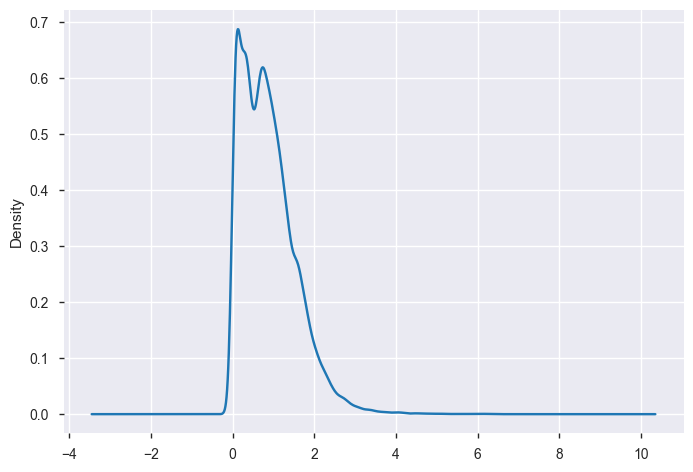

In [42]:
londres['energy_max'].plot.kde()
londres['energy_max'].skew()

## 4. Probabilidad

Ejemplo moneda:

In [43]:
from numpy.random import seed, randint

seed(1)

def coin_toss():
    if randint(0,2) == 1:
        return 'HEAD'
    else:
        return 'TAIL'
    
probabilities = []
heads = 0

for n in range(1, 10001):
    outcome=coin_toss()
    if outcome == 'HEAD':
        heads+=1
    current_probability=heads/n
    probabilities.append(current_probability)

print('Probabilidades obtenidas en los 10 primeros experimentos',probabilities[:10])
print('Probabilidades obtenidas en los 10 últimos experimentos',probabilities[-10:])

Probabilidades obtenidas en los 10 primeros experimentos [1.0, 1.0, 0.6666666666666666, 0.5, 0.6, 0.6666666666666666, 0.7142857142857143, 0.75, 0.7777777777777778, 0.7]
Probabilidades obtenidas en los 10 últimos experimentos [0.4993494144730257, 0.49939951961569257, 0.4993495446812769, 0.4993996397838703, 0.4993496748374187, 0.4992997198879552, 0.49934980494148246, 0.4993998799759952, 0.49934993499349933, 0.4994]


De todos modos, también podemos calcular la probabilidad sin la necesidad de hacer tantos experimentos:

$$ P(E) = \frac{\text{Eventos}}{\text{Posibles eventos}}$$

En el caso de un dado:

$$ P(\text{Número par}) = \frac{3}{6}$$

$$ P(\text{1 o 5}) = \frac{2}{6}$$


### Normas de probabilidad

Lo que tendremos normalmente es un *set* de posibles eventos, en el ejemplo del dado:

$$ \Omega = \text{{1,2,3,4,5,6}}$$

Si consideramos tirar dos dados:

<img src="Figures/pr1m2_sums.png" alt="Drawing" style="width: 600px;"/>

Calular las probabilidades de que entre las dos tirada salga un 6


Hay dos normas básicas para cacular probabilidades combinado dos posibles eventos.

$$ P(\text{A y B}) = P(A)P(B)$$

$$ P(\text{A o B}) = P(A) + P(B) - P(A)P(B)$$

O introduciendo una nueva notación:

$$ P(A \cup B) = P(A) + P(B) - P(A \cap B)$$


Otra norma importante es:
    
$$ P(A \cup \text{no A} ) = P(A) + P(\text{no A}) = 1$$
    

**Eventos independientes**

Cuando los eventos son independientes es cuando podemos usar la formula

$$ P(\text{A y B}) = P(A)P(B)$$


Por ejemplo, la probabilidad de sacar 4 veces una cruz:

$$ P(\text{Cruz 4 veces}) = P(Cruz)P(Cruz)P(Cruz)P(Cruz)$$

Pero si los eventos no son independientes no podemos usarla directamente. Por ejemplo

$$ P(A) = P(\text{Número par}) = \frac{3}{6}$$

$$ P(B) = P(\text{Número menor a 4}) = \frac{3}{6}$$

$$ P(A \cap B) = ?? $$



**Eventos con y sin reemplazo**

También se debe tener en cuenta si hay reemplazo en la muestra. Un ejemplo claro es una baraja de cartas.

¿Què probabilidad hay de sacar 4 ases seguidos en una baraja de cartas?

### 4.2 Combinatorias y permutaciones

En general para saber cuántas combinaciones e un evento pueden ocurrir, podemos usar la norma de la multiplicación.

$$ P(\text{Pin Móvil = 8424}) = \frac{1}{10·10·10·10}$$

En este caso, ¿había reemplazo?¿Y si no lo hay? 

A continuación teneis un cuadro resúmen de recordatorio de combinaciones y permutaciones

<img src="Figures/combinatoria.png" alt="Drawing" style="width: 600px;"/>


### 4.3 Probabilidad Bayesiana

<img src="Figures/content_bayes.jpg" alt="Drawing" style="width: 300px;"/>

La fórmula de Bayes sirve para computar **probabilidades condicionales**, es decir para calcular **probabilidades posteriores** a partir de observaciones

$$ P(H | E) = \frac{P(E | H)P(H)}{P(E)}$$

La estadística Bayesiana interpreta las probabilidades como medidas de confianza en un evento, no a partir de la frecuencia en que este evento ocurre a largo plazo.

Muchas veces, la formula se interpreta como una **actualización de la creencia** sobre unos datos observados.

<b> Bayes Theorem </b> <br>
$$ P(A | B) = \frac{P(B | A)P(A)}{P(B)}$$
</div>   


Describe la probabilidad condicional entre dos eventos.

Es fácilmente demostrable:

+ Sabemos que $ P(A \mbox{ and } B) = P(A)P(B | A) $.
+ Tambien tenemos $ P(A \mbox{ and } B) = P(B)P(A | B)$.
+ Juntando, $ P(A)P(B | A) = P(B)P(A | B)$. 

### Explicación de la fórmula.

La manera más usual de interpretarla es pensadno que $A$ es una hipotesis $H$, y $B$ es una evidencia $E$ que nos puede hacer cambiar nuestra creencia sobre $H$.

$$P(H | E) = P(H) \frac{P(E|H)}{P(E)}$$

Con cada nueva prueba o dato podremos actualizar la formula*. 


+ $P(H | E)$ es conocida como **posterior**.
+ $P(H)$ llamada **prior probability** de la hipotesis.
+ $P(E | H)$ llamada **likelihood** de la evidencia o datos.
+ $P(E)$ normaliza. Si tenemos $n$ hipotesis *mutuamente exclusivas* y *collectivelly exhaustive*, podemos calcular $P(E)$ as:

$$ P(E) = P(H_1)P(E|H_1) + \dots + P(H_n)P(E|H_n)$$


En general, $P(H | E), P(H), P(E|H), P(E)$ son funciones!

### Visualización y ejemplo

https://www.youtube.com/watch?v=D8VZqxcu0I0

https://www.youtube.com/watch?v=R13BD8qKeTg

## Bayesian Estimation


**El problema de los tanques en la II Guerra Mundial**

Los tanques alemanes estan enumerados  $1 \dots N$. Un soldado aliado ve un tanque con el número 60, cuántos tanques tiene Alemania?

> *(Fuente: http://greenteapress.com/thinkbayes/html/thinkbayes004.html#toc24)*

Sabemos que tendrá 60 o más, pero cuántos más?

Aplicando estadística Bayesana, podemos partir el problema en dos partes:

+ Qué sabíamos de $N$ antes de los nuevos datos?  **prior** $P(H)$
+ Para un valor de $N$, cuál es la *likelihood* de ver un tanque con el número $N$? **likelihood** $P(E|H)$.

Como no tenemos información para calcular el **prior** podemos asumir un valor del 1 al 1000 constante


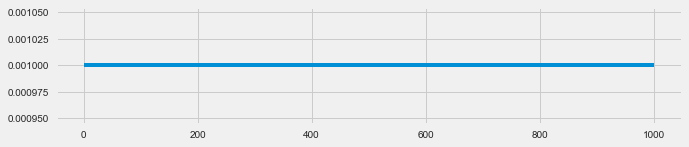

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

hypos = np.array(range(1, 1001))
priors = np.array([1.0/len(hypos) for hypo in hypos])

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,2))
    plt.plot(hypos, priors)
plt.show()

Ahora calculamos la función de **likelihood**, $P(E|H)$. 

En una hipotética situación con $N$ tanques, qué probabilidad tenemos de ver el número 60?

Si asumimos que solo hay un tanque con este número en todo el país y que es igual de fácil de ver cualquiera de los $N$ tanques, tenemos $1/N$ 

In [45]:
def Likelihood(data, hypo):
    if hypo < data:
        return 0.0
    else:
        return 1.0/hypo

Vamos a calcular ahora!

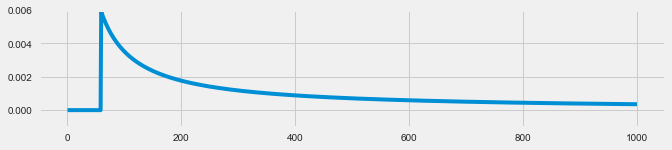

In [46]:
import numpy as np

def Posterior(data, hypos, priors):
    posterior = np.array([Likelihood(data, hypo) for hypo in hypos]) * priors
    return posterior

# After an update, the distribution is no longer normalized, 
# but because these hypotheses are mutually exclusive and 
# collectively exhaustive, we can renormalize.

def Normalize(d):
    total = d.sum()
    factor = 1.0 / total
    for i in range(len(d)):
        d[i] *= factor
    return d

posterior = Normalize(Posterior(60, hypos, priors))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,2))
    plt.ylim([-0.001,0.006])
    plt.plot(hypos, posterior)
plt.show()

El valor más probable es 60, pero qué número dirias tu?

Si quieres maximizar la probabilidad de acertar el número deberías decir 60, pero en nuestro caso nos puede interesar más decir el valor medio de la distribución de **posteriors**

In [47]:
def Meanp(hypos, posterior):
    total = 0.0
    s = hypos * posterior
    return s.mean()*len(hypos)

print(int(Meanp(hypos, posterior)))

333


Si queremos mejorar nuestras prediciones, necesitamos más datos para actualizar nuestra hipotesis

164


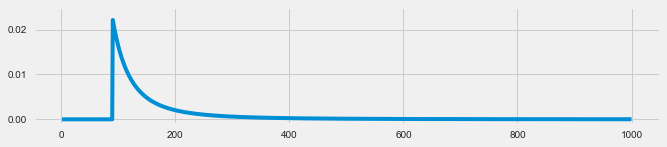

In [48]:
hypos = range(1, 1001)
posterior =  Normalize(Posterior(60, hypos, priors))
posterior2 = Normalize(Posterior(30, hypos, posterior))
posterior3 = Normalize(Posterior(90, hypos, posterior2))

print(int(Meanp(hypos, posterior3)))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,2))
    plt.ylim([-0.001,0.025])
    plt.plot(hypos, posterior3)
plt.show()

Media de la distribución del posterior con 1000 hipotesis:  164


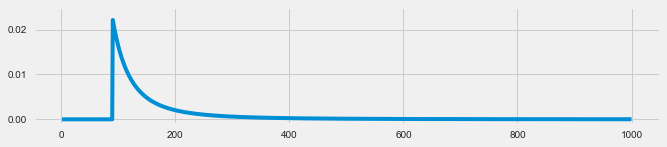

In [49]:
def Normalize(d):
    total = d.sum()
    factor = 1.0 / total
    for i in range(len(d)):
        d[i] *= factor
    return d

def Likelihood1(datum, hypo):
    if hypo < datum:
        return 0.0
    else:
        return 1.0/hypo
    
def Posterior(datum, hypos, priors, likelihood):
    import numpy as np
    posterior = np.array([likelihood(datum, hypo) for hypo in hypos]) * priors
    return posterior

def Posterior_n(data, hypos, priors, likelihood):
    p = priors
    for d in data:
        posterior =  Normalize(Posterior(d, hypos, p, likelihood))
        p = posterior
    return posterior

def Meanp(hypos, posterior):
    total = 0.0
    s = hypos * posterior
    return s.mean()*len(hypos)

hypos = np.array(range(1, 1001))
priors = np.array([1.0/len(hypos) for hypo in hypos])
posteriors = Posterior_n([60,30,90], hypos, priors, Likelihood1)

print('Media de la distribución del posterior con 1000 hipotesis: ', \
        int(Meanp(hypos, posteriors)))

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,2))
    plt.ylim([-0.001,0.025])
    plt.plot(hypos, posteriors)
plt.show()